In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("house_prices_train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


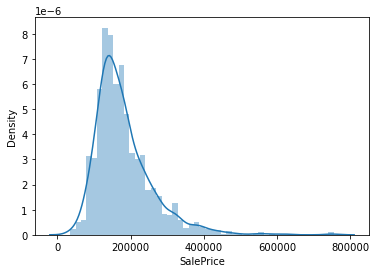

In [6]:
sns.distplot(df_train["SalePrice"])

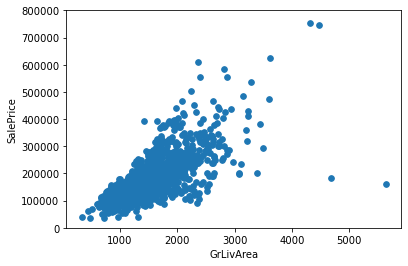

In [7]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);


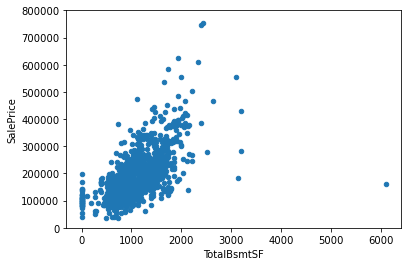

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


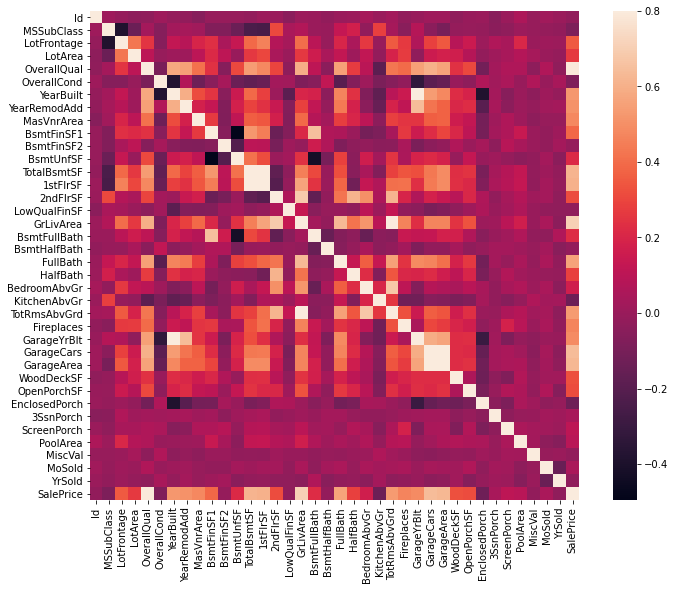

In [9]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

E:\anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


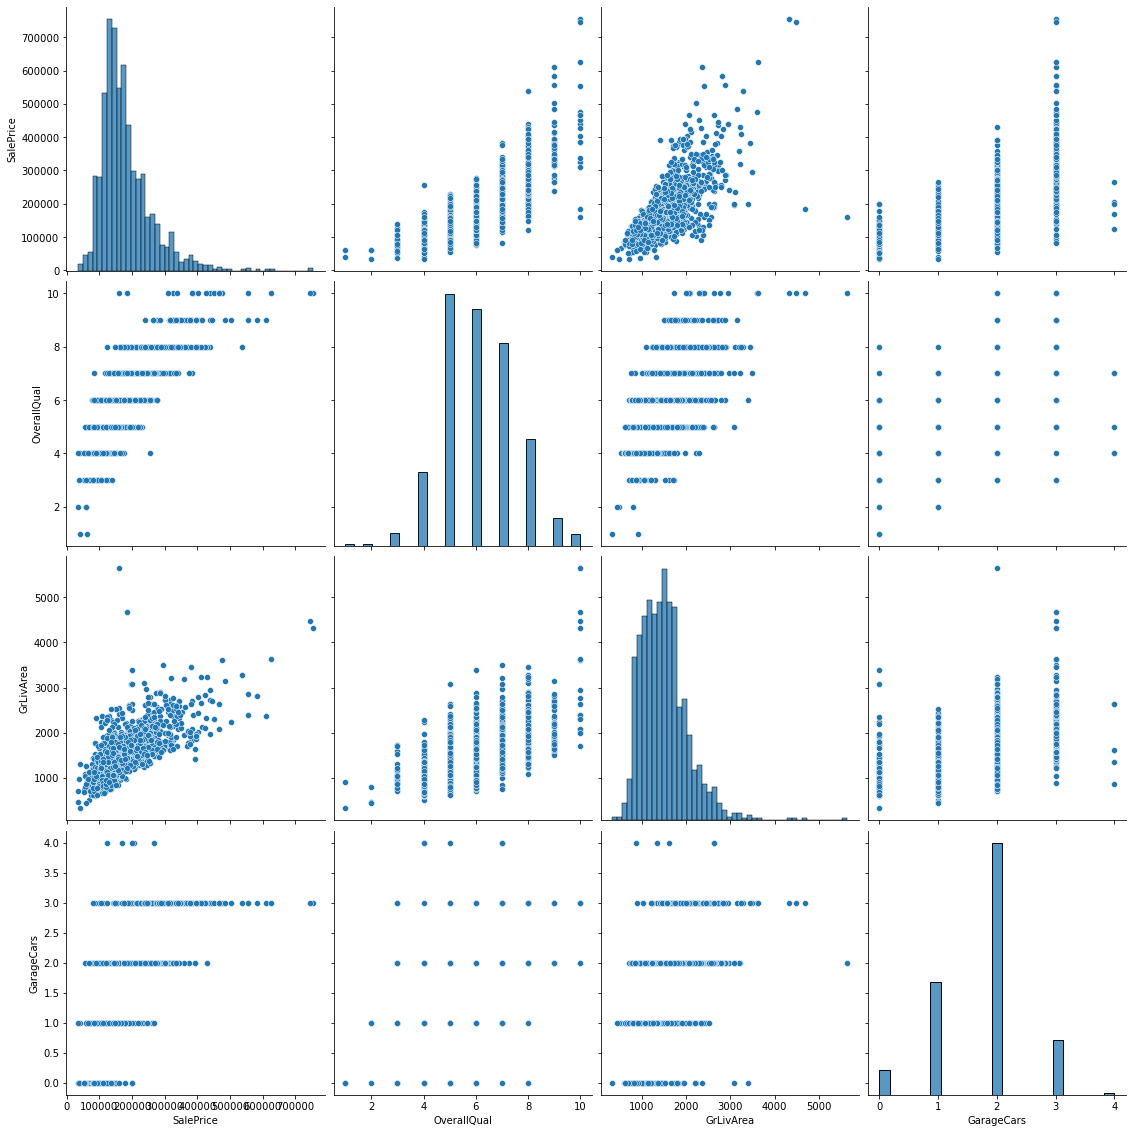

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);


# Percentage of Missing Values

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(5))
print(missing_data.shape)

             Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
(81, 2)


In [12]:
missing_data.to_csv("missing_data.csv")

# Handling Missing values

In [13]:
df_train_drop = df_train.drop(["PoolQC","MiscFeature","Alley","Fence"], axis = 1)
print(df_train_drop.shape)

(1460, 77)


# Checking Variable type

In [14]:
dict1 = dict(df_train_drop.dtypes)


In [15]:
cat_col = []
num_col = []
for key,values in dict1.items():
    key = str(key)
    values = str(values)
    
    if values == "object":
        cat_col.append(key)
    else:
        num_col.append(key)
        

print(cat_col[0:5])
print(num_col[0:5])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']


# Count of numerical and categorical columns

In [16]:
print(len(cat_col))
print(len(num_col))

39
38


In [17]:
cat_df = df_train_drop[cat_col]
num_df = df_train_drop[num_col]

In [18]:
print(cat_df.shape)

(1460, 39)


# Handling Missing Values (Mean of numerical and mode of categorical Data)

In [19]:
num_df_mean = num_df.fillna(num_df.mean())
for column in cat_df:
    cat_df[column]=cat_df[column].fillna(cat_df[column].mode()[0])

<ipython-input-19-3124bce4f440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column]=cat_df[column].fillna(cat_df[column].mode()[0])


In [20]:
cat_df.shape

(1460, 39)

In [21]:
total = num_df_mean.isnull().sum().sort_values(ascending=False)
percent = (num_df_mean.isnull().sum()/num_df_mean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.to_csv("missing_values_num.csv")

In [22]:
total = cat_df.isnull().sum().sort_values(ascending=False)
percent = (cat_df.isnull().sum()/cat_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.to_csv("missing_values_cat.csv")

# Labelencoding Data

In [23]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
for column in cat_df:
    cat_df[column]= label_encoder.fit_transform(cat_df[column])

<ipython-input-23-50451ee13172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column]= label_encoder.fit_transform(cat_df[column])


In [24]:
data_train_missing_handling = pd.concat([num_df_mean,cat_df], axis=1)

In [25]:
print(data_train_missing_handling.shape)

(1460, 77)


In [26]:
X = data_train_missing_handling.drop(["SalePrice",'Id'], axis=1)
Y = data_train_missing_handling["SalePrice"]

In [27]:
col_names = num_col
col_names.remove('Id')
col_names.remove('SalePrice')


In [28]:
from sklearn.preprocessing import StandardScaler

features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [29]:
X.shape

(1460, 75)

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features,Y,test_size = 0.20)

In [32]:
X_test.shape

(292, 36)

# Building Basline model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = model.predict(X_test)

In [37]:
print("LinearRegression", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of LinearRegression: ",r2_score(y_test,predictions))

LinearRegression 42234.31015818247
R-score of LinearRegression:  0.7821546113775766


Text(0.5, 0.98, 'Actual vs Predicted')

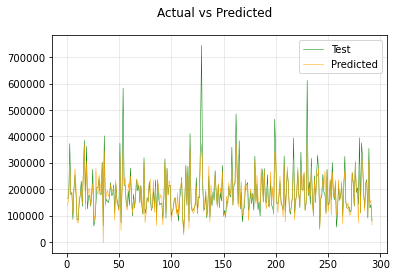

In [38]:
fig = plt.figure()
c = [i for i in range(1,293,1)]
plt.plot(c,y_test, color = 'green', linewidth = 0.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 0.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

In [39]:
import statsmodels.api as sm


In [42]:
X_train.reshape(-1,1).shape


(42048, 1)

In [44]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
# predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        04:54:07   Log-Likelihood:                -13797.
No. Observations:                1168   AIC:                         2.766e+04
Df Residuals:                    1133   BIC:                         2.784e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.799e+05    973.985    184.741      0.0